In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [15]:
dataset4 = pd.read_csv('Exp_4.csv')
X4 = dataset4.iloc[:, :-1].values
y4 = dataset4.iloc[:, -1].values

In [16]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4)

In [17]:
model4 = []

model4.append(KNeighborsClassifier())
model4.append(MLPClassifier())
model4.append(SVC(probability=True))
model4.append(RandomForestClassifier())
model4.append(AdaBoostClassifier(RandomForestClassifier()))
model4.append(AdaBoostClassifier(SVC(probability=True, kernel='linear')))
model4.append(XGBClassifier())
model_names = ['KNN', 'BPNN', 'Kernel SVM', 'Random Forest', 'Adaboost Random Forest', 'Adaboost SVM', 'XGBoost']

In [18]:
for i in range(len(model4)):
    print(f"Training {model_names[i]}...")
    model4[i].fit(X4_train,y4_train)

Training KNN...
Training BPNN...


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Kernel SVM...
Training Random Forest...
Training Adaboost Random Forest...
Training Adaboost SVM...
Training XGBoost...


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier()
Accuracy : 0.9815950920245399
Confusion Matrix:
 [[114   0]
 [  3  46]]


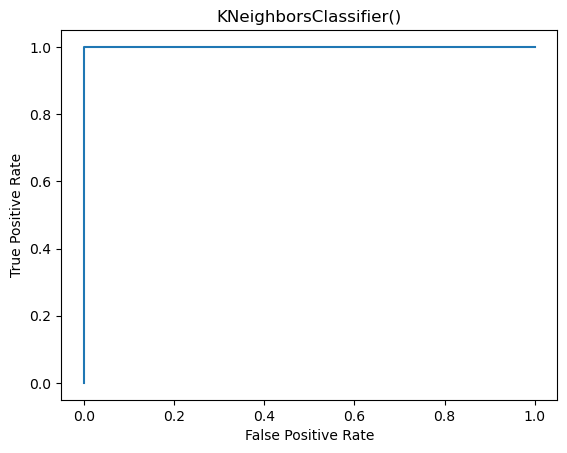

----------------------------------------------------
MLPClassifier()
Accuracy : 0.8343558282208589
Confusion Matrix:
 [[114   0]
 [ 27  22]]


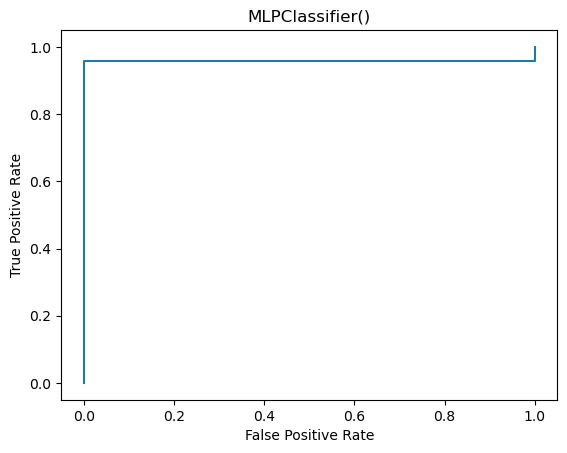

----------------------------------------------------
SVC(probability=True)
Accuracy : 0.8895705521472392
Confusion Matrix:
 [[114   0]
 [ 18  31]]


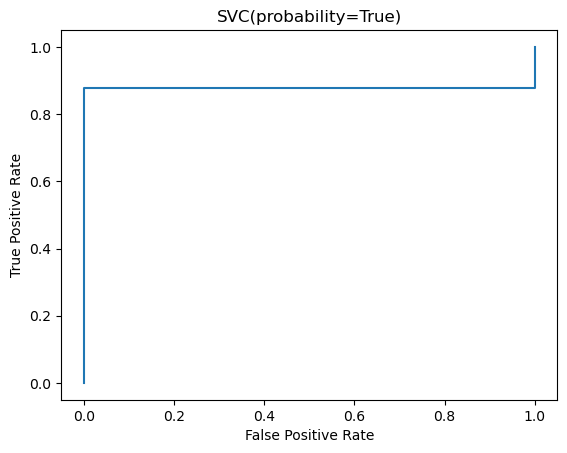

----------------------------------------------------
RandomForestClassifier()
Accuracy : 0.9938650306748467
Confusion Matrix:
 [[114   0]
 [  1  48]]


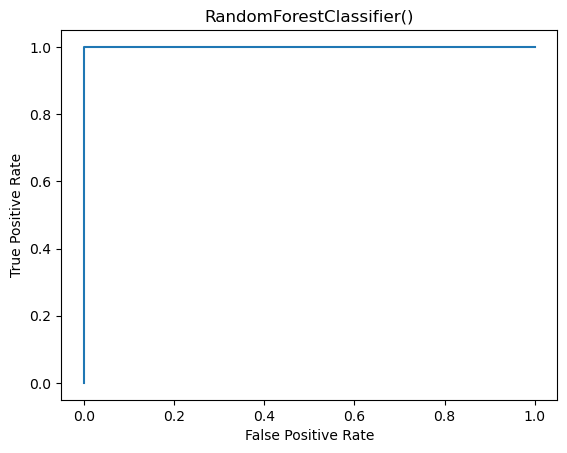

----------------------------------------------------
AdaBoostClassifier(base_estimator=RandomForestClassifier())
Accuracy : 0.9938650306748467
Confusion Matrix:
 [[114   0]
 [  1  48]]


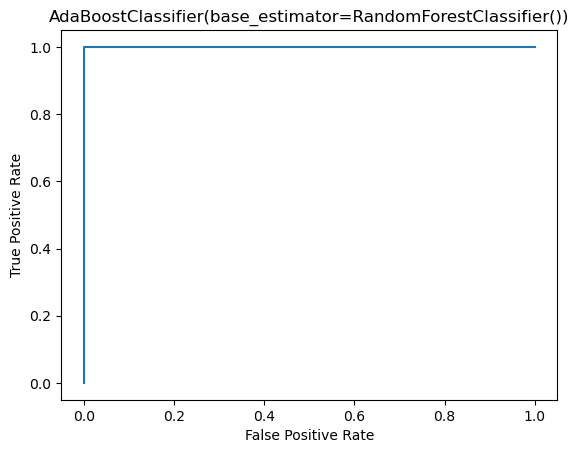

----------------------------------------------------
AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True))
Accuracy : 0.7484662576687117
Confusion Matrix:
 [[114   0]
 [ 41   8]]


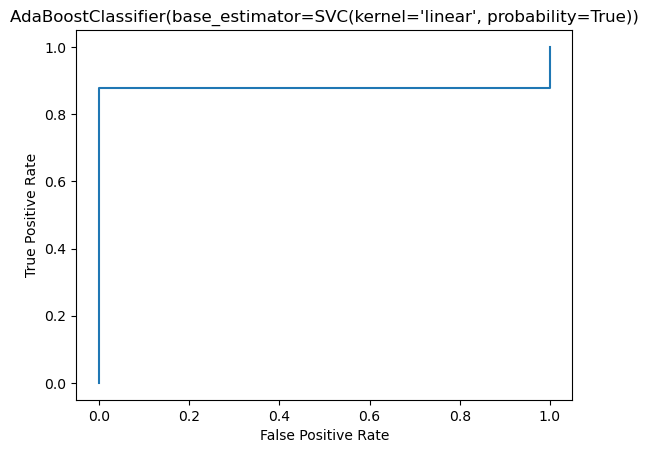

----------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy : 0.9754601226993865
Confusion Matrix:
 [[114   0]
 [  4  45]]


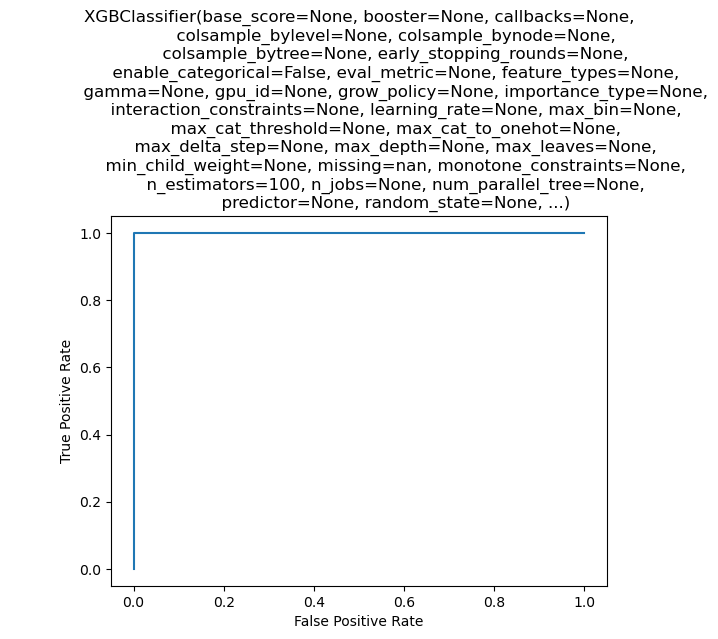

----------------------------------------------------


In [19]:
for i in range(len(model4)):
  y_pred = model4[i].predict(X4_test)
  pred_prob = model4[i].predict_proba(X4_test)
  fpr,tpr,thresholds = roc_curve(y4_test,pred_prob[:,1])
  print(model4[i])
  print("Accuracy :",accuracy_score(y4_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y4_test,y_pred))
  plt.plot(fpr,tpr)
  plt.title(model4[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  print("----------------------------------------------------")

C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy: 1.0
KNN confusion matrix:
[[108   0]
 [  0  55]]
KNN ROC AUC: 1.0


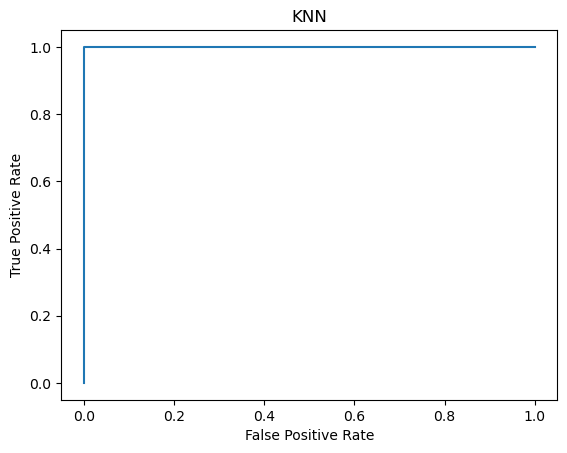

----------------------------------------------------
BPNN accuracy: 1.0
BPNN confusion matrix:
[[108   0]
 [  0  55]]
BPNN ROC AUC: 1.0


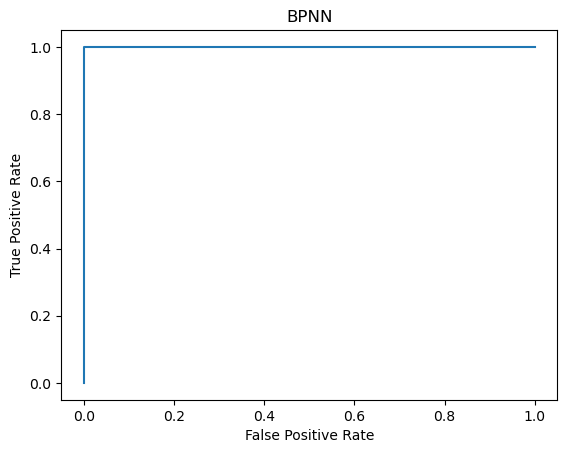

----------------------------------------------------
Kernel SVM accuracy: 1.0
Kernel SVM confusion matrix:
[[108   0]
 [  0  55]]
Kernel SVM ROC AUC: 1.0


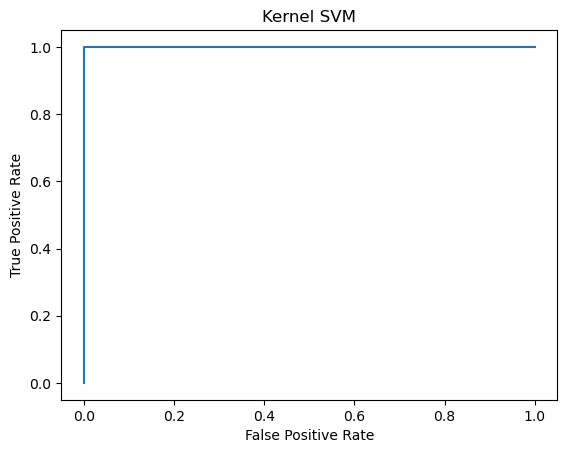

----------------------------------------------------
Random Forest accuracy: 1.0
Random Forest confusion matrix:
[[108   0]
 [  0  55]]
Random Forest ROC AUC: 1.0


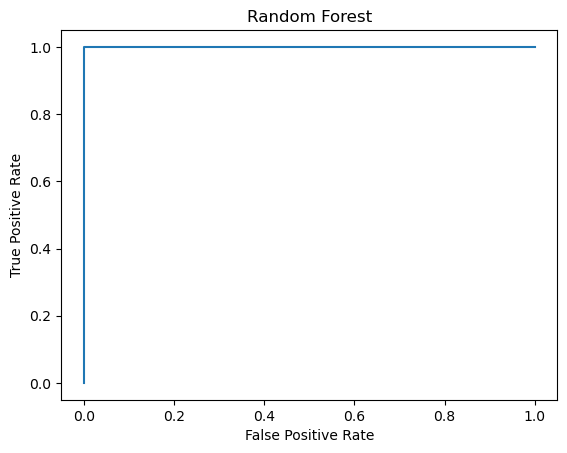

----------------------------------------------------
Adaboost Random Forest accuracy: 1.0
Adaboost Random Forest confusion matrix:
[[108   0]
 [  0  55]]
Adaboost Random Forest ROC AUC: 1.0


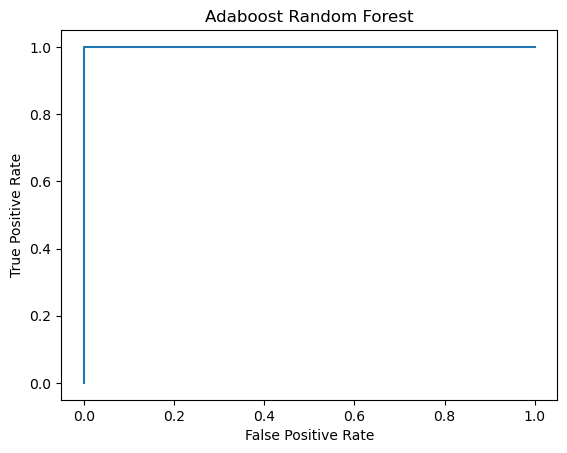

----------------------------------------------------
Adaboost SVM accuracy: 1.0
Adaboost SVM confusion matrix:
[[108   0]
 [  0  55]]
Adaboost SVM ROC AUC: 1.0


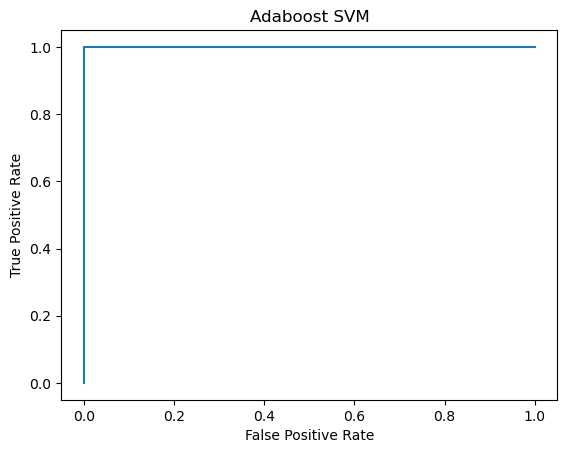

----------------------------------------------------
XGBoost accuracy: 0.9938650306748467
XGBoost confusion matrix:
[[108   0]
 [  1  54]]
XGBoost ROC AUC: 1.0


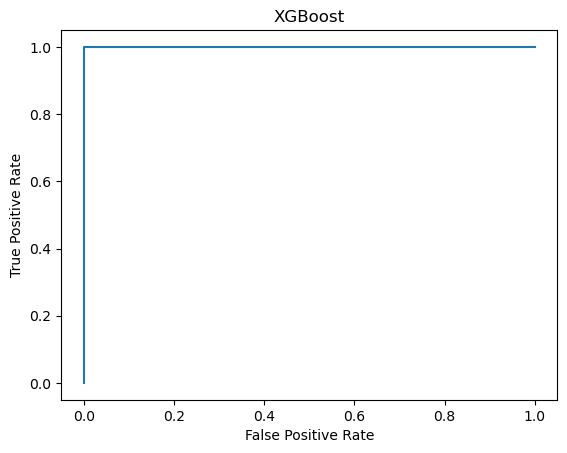

----------------------------------------------------


In [8]:
for i, model4 in enumerate(models4):
    y_pred = model4.predict(X4_test)
    acc = accuracy_score(y4_test, y_pred)
    cm = confusion_matrix(y4_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y4_test, model4.predict_proba(X4_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"{model_names[i]} accuracy: {acc}")
    print(f"{model_names[i]} confusion matrix:\n{cm}")
    print(f"{model_names[i]} ROC AUC: {roc_auc}")
    plt.plot(fpr,tpr)
    plt.title(model_names[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print("----------------------------------------------------")

In [20]:
datasets4p = pd.read_csv('Exp_4.csv')
X4p = datasets4p.iloc[:, :-1].values
y4p = datasets4p.iloc[:, -1].values

In [21]:
X4p_train, X4p_test, y4p_train, y4p_test = train_test_split(X4p, y4p)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X4p_train = pca.fit_transform(X4p_train)
X4p_test = pca.transform(X4p_test)

In [23]:
X4p_train = pd.DataFrame(X4p_train, columns = ['Feature_1', 'Feature_2'])
X4p_train.head()

,Feature_1,Feature_2
0,-0.116517,-0.003947
1,-0.116517,-0.003947
2,-0.116517,-0.003947
3,-0.339987,-0.722428
4,-0.116517,-0.003947


<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

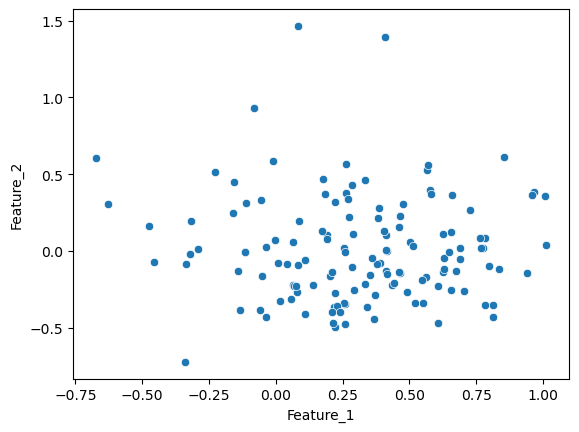

In [24]:
sns.scatterplot(data = X4p_train , x='Feature_1', y='Feature_2')

In [25]:
models4p = []

models4p.append(KNeighborsClassifier())
models4p.append(MLPClassifier())
models4p.append(SVC(probability=True))
models4p.append(RandomForestClassifier())
models4p.append(AdaBoostClassifier(RandomForestClassifier()))
models4p.append(AdaBoostClassifier(SVC(probability=True, kernel='linear')))
model4.append(XGBClassifier())
model_names = ['KNN', 'BPNN', 'Kernel SVM', 'Random Forest', 'Adaboost Random Forest', 'Adaboost SVM', 'XGBoost']

In [26]:
for i in range(len(models4p)):
    models4p[i].fit(X4p_train,y4p_train)

C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNeighborsClassifier()
Accuracy : 0.9877300613496932
Confusion Matrix:
 [[127   0]
 [  2  34]]


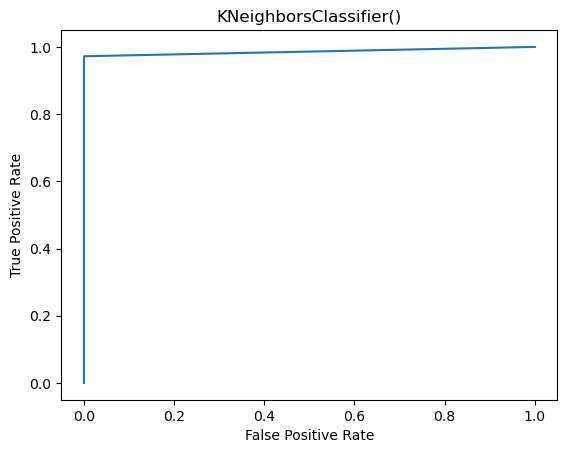

----------------------------------------------------
MLPClassifier()
Accuracy : 0.950920245398773
Confusion Matrix:
 [[127   0]
 [  8  28]]


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


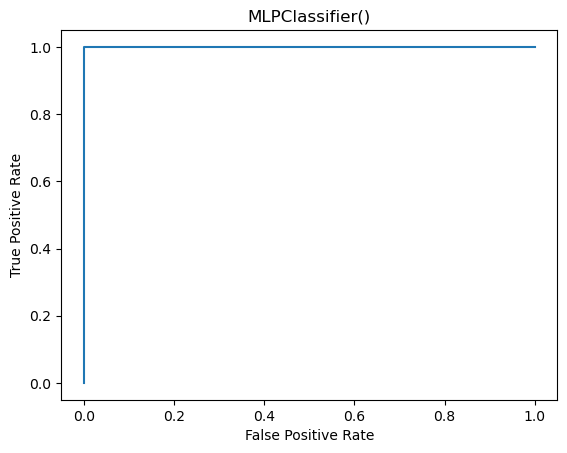

----------------------------------------------------
SVC(probability=True)
Accuracy : 0.9877300613496932
Confusion Matrix:
 [[127   0]
 [  2  34]]


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


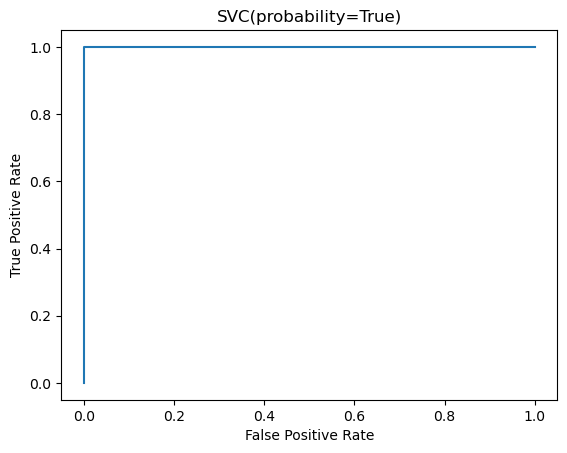

----------------------------------------------------
RandomForestClassifier()
Accuracy : 1.0
Confusion Matrix:
 [[127   0]
 [  0  36]]


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


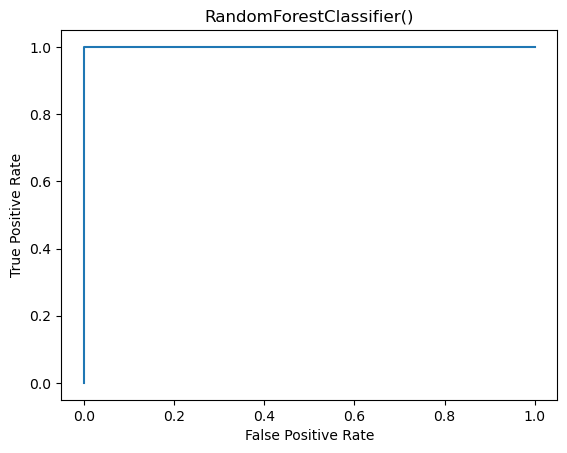

----------------------------------------------------
AdaBoostClassifier(base_estimator=RandomForestClassifier())
Accuracy : 1.0
Confusion Matrix:
 [[127   0]
 [  0  36]]


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


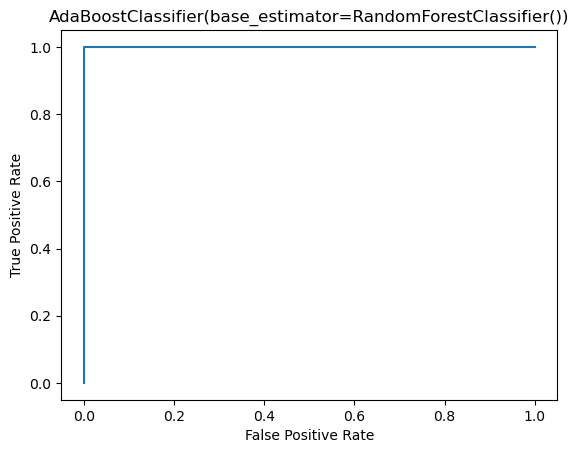

----------------------------------------------------


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True))
Accuracy : 0.9141104294478528
Confusion Matrix:
 [[127   0]
 [ 14  22]]


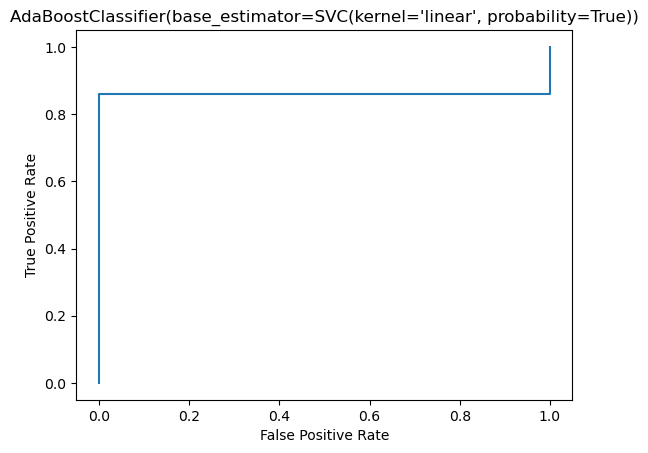

----------------------------------------------------


In [27]:
for i in range(len(models4p)):
  yp_pred = models4p[i].predict(X4p_test)
  pred_prob = models4p[i].predict_proba(X4p_test)
  fpr,tpr,thresholds = roc_curve(y4p_test,pred_prob[:,1])
  print(models4p[i])
  print("Accuracy :",accuracy_score(y4p_test,yp_pred))
  print("Confusion Matrix:\n",confusion_matrix(y4p_test,yp_pred))
  plt.plot(fpr,tpr)
  plt.title(models4p[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  print("----------------------------------------------------")